--- Scikit-learn Linear Regression (MinMaxScaler) ---

First 5 rows of the loaded data (df1):
   Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

Data Info (df1):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB

First 5 rows after MinMaxScaler scaling:
   Gender    Height    Weight
0   Male  0.165212  0.863139
1   Male  0.122482  0.475476
2   Male  0.167432  0.721131
3   Male  0.147361  0.756699
4   Male  0.131761  0.689999

Shape of X: (10000, 1), Shape of Y: (10000, 1)

--- Scikit-learn Model Evaluation ---
Mean Squared Error (MSE): 0.0044380479
R-squ

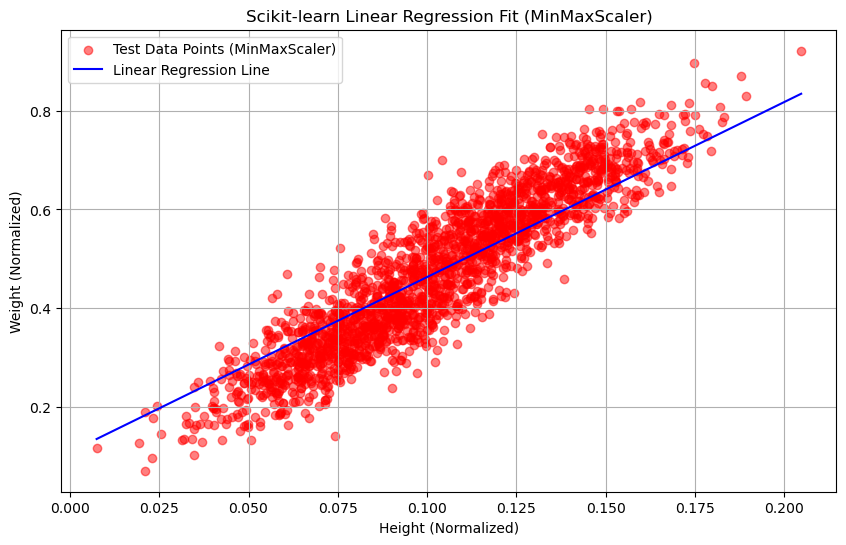

Saved graph: linear_regression_scikitlearn.png

--- Gradient Descent Linear Regression (Z-score) ---

Shape of X after Z-score: (10000, 1), Shape of Y after Z-score: (10000,)
Shape of X after adding bias term: (10000, 2)

--- Gradient Descent Training ---
Iteration 1: MSE = 1.0000000000
Iteration 2: MSE = 0.9858094193
Iteration 3: MSE = 0.9719012311
Iteration 4: MSE = 0.9582698159
Iteration 5: MSE = 0.9449096658
Iteration 6: MSE = 0.9318153828
Iteration 7: MSE = 0.9189816759
Iteration 8: MSE = 0.9064033598
Iteration 9: MSE = 0.8940753523
Iteration 10: MSE = 0.8819926720
Iteration 100: MSE = 0.3843855142
Iteration 200: MSE = 0.2999658331
Iteration 300: MSE = 0.2886553117
Iteration 400: MSE = 0.2871399317
Iteration 500: MSE = 0.2869369016
Iteration 600: MSE = 0.2869096997
Iteration 700: MSE = 0.2869060552
Iteration 800: MSE = 0.2869055669
Iteration 900: MSE = 0.2869055015
Iteration 1000: MSE = 0.2869054927

--- Gradient Descent Final Results ---
Final parameters (Intercept, Slope): [-1.5

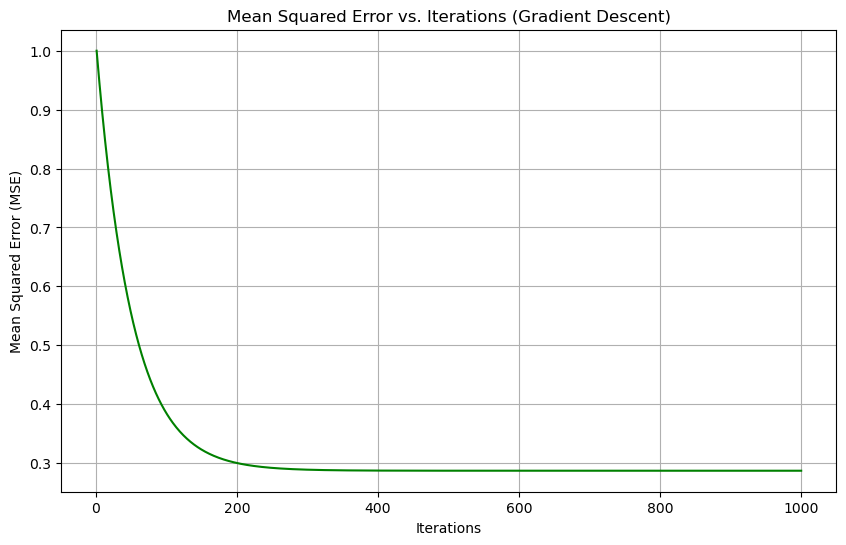

Saved graph: mse_vs_iterations_gradient_descent.png


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Scikit-learn Implementation (MinMaxScaler) ---
print("--- Scikit-learn Linear Regression (MinMaxScaler) ---")

# Load the dataset
df1 = pd.read_csv("weight-height.csv")
print("\nFirst 5 rows of the loaded data (df1):\n", df1.head())
print("\nData Info (df1):\n")
df1.info()

# Standardize numerical features using MinMaxScaler
col = ["Height", "Weight"]
S1 = MinMaxScaler()
df1[col] = S1.fit_transform(df1[col])
print("\nFirst 5 rows after MinMaxScaler scaling:\n", df1.head())

# Prepare dependant and independant variables
X = df1[["Height"]].to_numpy()
Y = df1[["Weight"]].to_numpy()
print(f"\nShape of X: {X.shape}, Shape of Y: {Y.shape}")

# Split the data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=67)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Calculating the Mean Squared Error (MSE) and R-squared (R2)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("\n--- Scikit-learn Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.10f}")
print(f"R-squared (R2): {r2:.10f}")
print(f"Model Coefficient (Slope): {model.coef_[0][0]:.10f}")
print(f"Model Intercept: {model.intercept_[0]:.10f}")

# Plot the linear regression Model (First Graph)
plt.figure(figsize=(10, 6))

# Plot test data points
plt.scatter(X_test, Y_test, color="red", alpha=0.5, label="Test Data Points (MinMaxScaler)")

# Generate line points over the range of test data
X_line = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
Y_line = model.predict(X_line)

plt.plot(X_line, Y_line, color="blue", label="Linear Regression Line")
plt.title("Scikit-learn Linear Regression Fit (MinMaxScaler)")
plt.xlabel("Height (Normalized)")
plt.ylabel("Weight (Normalized)")
plt.legend()
plt.grid(True)
plt.savefig("linear_regression_scikitlearn.png")
plt.show()
plt.close()
print("Saved graph: linear_regression_scikitlearn.png")


# --- 2. Gradient Descent Implementation (Z-score Standardization) ---
print("\n--- Gradient Descent Linear Regression (Z-score) ---")

# Load the Height and weight to independent and dependent variable
df2 = pd.read_csv("weight-height.csv")
X = df2['Height'].values.reshape(-1, 1)
Y = df2["Weight"].values

# Standardizes the features X and target variable y using Z-score normalization
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
Y = (Y - np.mean(Y, axis=0)) / np.std(Y, axis=0)
print(f"\nShape of X after Z-score: {X.shape}, Shape of Y after Z-score: {Y.shape}")

# add another feature to X corresponding to bias (intercept)
X = np.hstack((np.ones((X.shape[0], 1)), X))
print(f"Shape of X after adding bias term: {X.shape}")

# weight or parameter initialization
theta = np.zeros(X.shape[1]) # theta[0] is intercept, theta[1] is slope
iterations = 1000
learningrate = 0.01
mseh = []

print("\n--- Gradient Descent Training ---")
for i in range(iterations):
    y_pred = np.dot(X, theta)
    mse = mean_squared_error(Y, y_pred)
    mseh.append(mse)

    # Print a subset of iterations as requested by the user's verbose output pattern
    if (i + 1) <= 10 or (i + 1) % 100 == 0:
        print(f"Iteration {i+1}: MSE = {mse:.10f}")

    # Gradient Descent update rule
    gradient = np.dot(X.T, (y_pred - Y)) / len(Y)
    theta -= learningrate * gradient

print(f"\n--- Gradient Descent Final Results ---")
print(f"Final parameters (Intercept, Slope): {theta}")
print(f"Final MSE after {iterations} iterations: {mseh[-1]:.10f}")

# Plot MSE vs Iteration (Second Graph)
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), mseh, color='green')
plt.title("Mean Squared Error vs. Iterations (Gradient Descent)")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.savefig("mse_vs_iterations_gradient_descent.png")
plt.show()
plt.close()
print("Saved graph: mse_vs_iterations_gradient_descent.png")